<a href="https://colab.research.google.com/github/Umesh2851997/Machine-Learning/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**   - Netflix Movies and TV Shows Clustering


##### **Project Type**    - Unsupervised
##### **Contribution**    - Umesh Makkar (Individual)

# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

innitially we start with understanding the data set, then we clean the data to make analysis ready.

explore the data and understand the behaviour of the same.

we then prepare the data for creating clusters by various parameters wherein we remove stop words, white spaces numbers etc so that we can get important words and based on that we shall form clusters.

later I have used the silhoute method and kmeans elbow method to find optimal number of clusters and built recommender system by cosine similarity and recommended top 5 movies.

# **GitHub Link -**

https://github.com/Umesh2851997/Machine-Learning/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb

# **Problem Statement**


Netflix, as of 2022-Q2, stands as the foremost global provider of online streaming services, boasting a subscriber base exceeding 220 million. It is imperative for the platform to adeptly categorize its hosted shows to heighten user satisfaction and mitigate subscriber attrition.

This project aims to discern similarities and differences among Netflix shows by creating clusters. These clusters can then be utilized to furnish users with personalized show recommendations aligned with their preferences.

The primary objective is to categorize Netflix shows into distinct clusters, ensuring that shows within a cluster share similarities while those in separate clusters exhibit dissimilarity.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Numpy & Pandas for data processing & wrangling
import numpy as np
import pandas as pd

#Data Visulization tools
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import missingno as msno

#Importing libraries for hypothesis testing
from scipy.stats import uniform #Uniform Distribution
from scipy.stats import norm #Normal Distribution (Gaussian Distribution)
from scipy.stats import chi2 #Chi-squared Distribution
from scipy.stats import t #t Distribution
from scipy.stats import f #f Distribution
from scipy.stats import ttest_ind #independent two-sample t-test
import scipy.stats as stats #Statistical Function

# Clusters impelementation Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *
import scipy.cluster.hierarchy as sch

#Others Libraries
import warnings
warnings.filterwarnings('ignore')
#font size throughout the notebook
plt.rcParams.update({'font.size': 14})
# plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/My_new_numpy/netflix_titles.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rc = df.shape
print(f'This data set has {rc[0]} rows and {rc[1]} columns. ')

This data set has 8807 rows and 12 columns. 


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate = df.duplicated().sum()
print(f'this data set has {duplicate} duplicate')

this data set has 0 duplicate


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)
print('-'*50)
print('Missing values in Proportion')
missing_percentages = (df.isna().mean() * 100).round(2)
print(missing_percentages)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Missing values in Proportion
show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64


Text(0.5, 1.0, 'Visualizing the missing values')

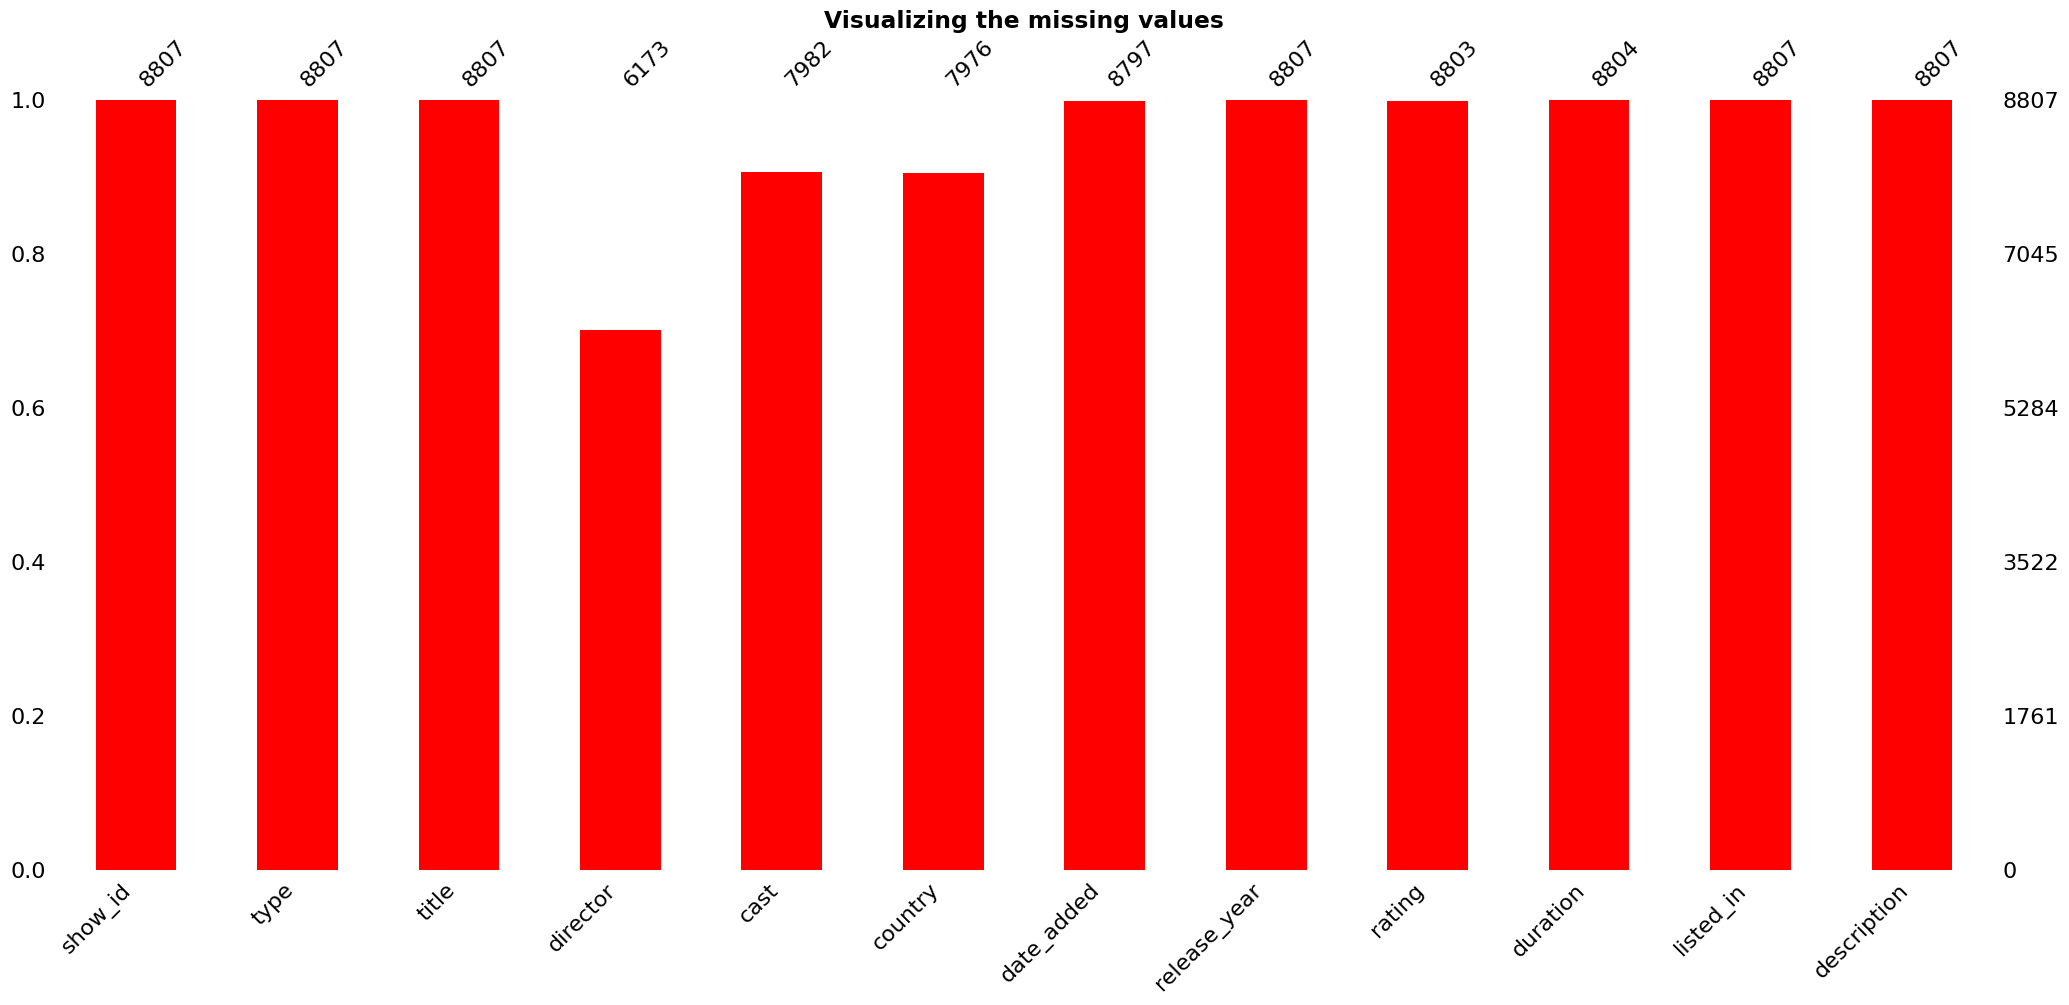

In [9]:
# Visualizing the missing values
my_palette = sns.color_palette('Reds', 1)
msno.bar(df,color = 'Red')
#msno.heatmap(df, cmap=my_palette)
plt.title('Visualizing the missing values')

### What did you know about your dataset?

show_id: Unique Id number for all the listed rows

type: denotes type of show namely TV Show or Movie

title: title of the movie

director: Name of director/directors

cast: lists the cast of the movie

country: country of the production house

date_added: the date the show was added

release_year: year of the release of the show

rating: show ratings

duration: duration of the show

listed_in: the genre of the show

description: summary/ description of the movie

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

show_id: Unique Id number for all the listed rows

type: denotes type of show namely TV Show or Movie

title: title of the movie

director: Name of director/directors

cast: lists the cast of the movie

country: country of the production house

date_added: the date the show was added

release_year: year of the release of the show

rating: show ratings

duration: duration of the show

listed_in: the genre of the show

description: summary/ description of the movie

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## 3. ***Data Wrangling***

In [13]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# filling cast value as not available
df['cast'] = df['cast'].fillna(value='Not available')

# filling contry null values as not known, the same can be replaced by mode of the country using the below commented code
# Note: only one line should be selected to run this
df['country'] = df['country'].fillna(value='Not Known')

# since date_added and rating have low % share that is 0.13 and 0.09 we are dropping the same
df = df.dropna(subset=['date_added','rating'])

# Too many missing values in director column, we are dropping
df = df.drop(['director'],axis=1)

In [15]:
df = df.dropna(subset=['duration'])

In [16]:
df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?

Imputed missing values in the "cast" column with "Not available."

Imputed missing values in the "cast" column with "Not Known."
Removed rows with missing values in the "date_added"

Removed rows with missing values in the "ratings"

Dropped the entire "director" column, as it contained 30% missing data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

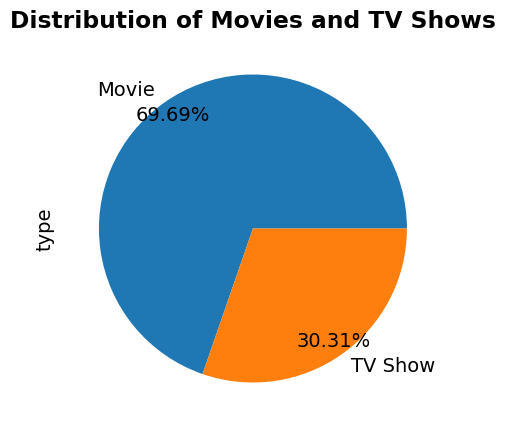

In [17]:
# Chart - 1 visualization code
type_counts = df['type'].value_counts()

# Set the figure size
plt.rcParams['figure.figsize'] = (5, 5)

# Set the distance for displaying values inside the pie chart
pct_distance = 0.9

# Plot a pie chart with percentage labels
type_counts.plot(kind='pie', autopct='%1.2f%%', pctdistance=pct_distance)

# Set the title for the pie chart
plt.title('Distribution of Movies and TV Shows')

# Display the pie chart
plt.show()

#save in png


##### 1. Why did you pick the specific chart?

Easy to undertand & interpret the logic and share the percentage using PIE.

##### 2. What is/are the insight(s) found from the chart?

69.05% of the data is of movies while 30.95% of the data belongs to TV Shows

#### Chart - 2

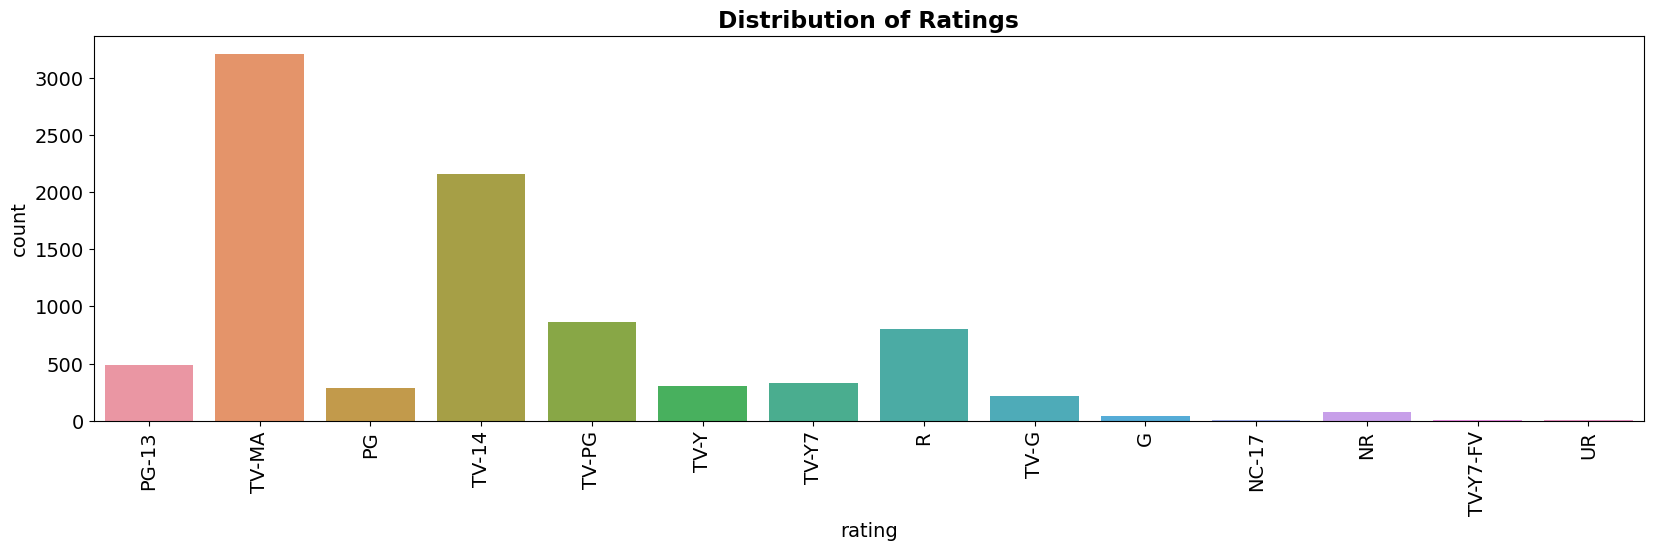

Rating Counts:
 TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64


In [18]:
# Chart - 2 visualization code
# Set the figure size for the countplot
plt.figure(figsize=(20, 5))

# Create a countplot for the 'rating' column in the DataFrame
sns.countplot(x='rating', data=df)

# Set the title for the countplot
plt.title('Distribution of Ratings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the countplot
plt.show()

# Print the counts for reference
print("Rating Counts:\n", df['rating'].value_counts())

##### 1. Why did you pick the specific chart?

Countplot is easy to visualize the data.

##### 2. What is/are the insight(s) found from the chart?

It is found that most of the ratings are given by TV-MA(2863) followed by TV-14(1931) the least ratings are by NC-17(3)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Very good to understand the Rating system.

#### Chart - 3

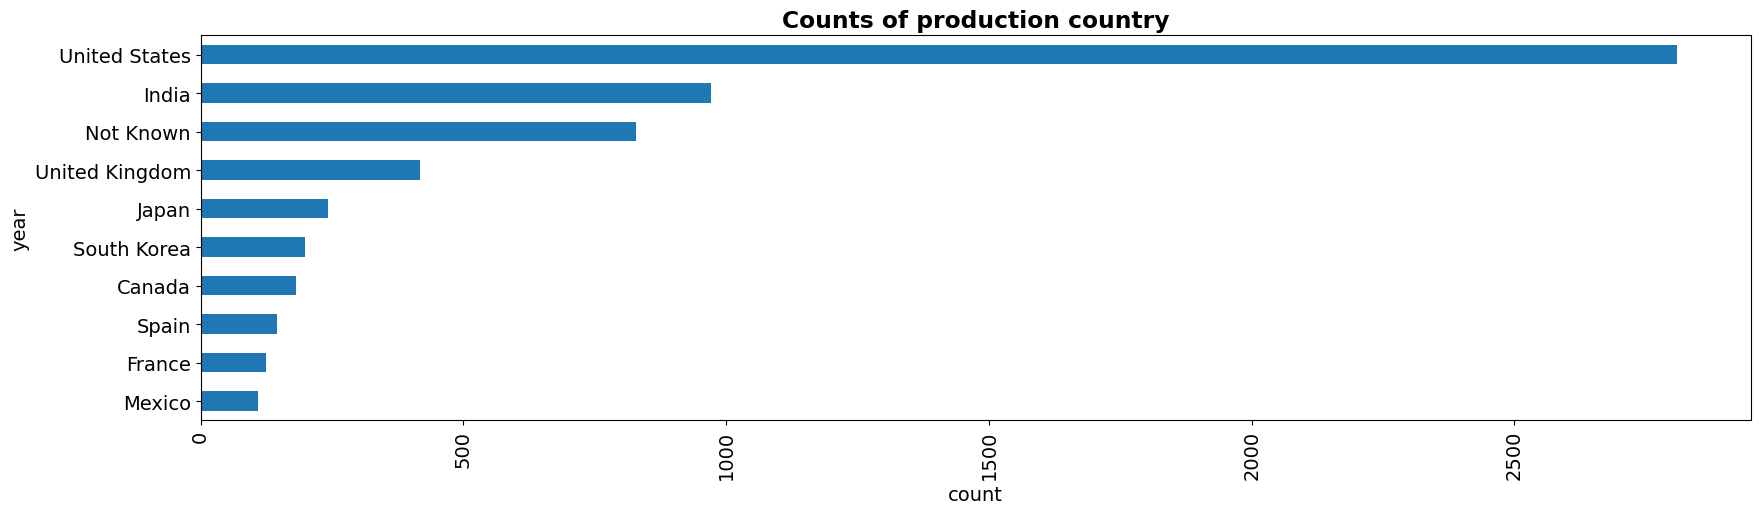

United States     2809
India              972
Not Known          829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64


In [19]:
# Chart - 3 visualization code
plt.figure(figsize=(20, 5))
df['country'].value_counts().head(10).sort_values(ascending = True).plot(kind='barh')

# setting chart title
plt.title('Counts of production country')
plt.xticks(rotation = 90)
plt.ylabel('year')
plt.xlabel('count')
# displaying the  chart

plt.show()

# printing the counts for reference
print(df.country.value_counts().head(10))

##### 1. Why did you pick the specific chart?

Good to Visualize & Interpret the dat using this chart

##### 2. What is/are the insight(s) found from the chart?

Most of the content belongs to United States, followed by india.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Data will be Useful to understand the country wise production.

#### Chart - 4

In [20]:
df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

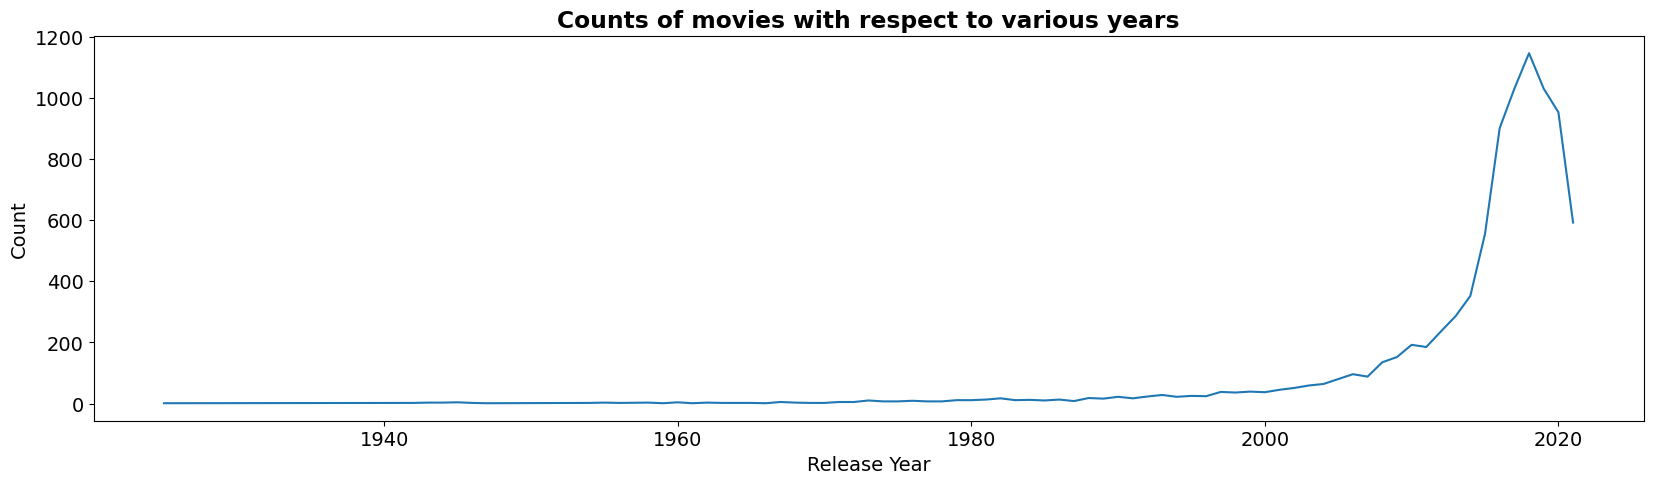

In [21]:
# Chart - 4 visualization code
# creating temp dataframe
temp_data_df = df.groupby(['release_year'])['show_id'].count()
plt.rcParams['figure.figsize'] = (20, 5)

# plotting the temp df
temp_data_df.plot.line()
# setting chart title
plt.title('Counts of movies with respect to various years')
plt.ylabel('Count')
plt.xlabel('Release Year')
# display chart
plt.show()


##### 1. Why did you pick the specific chart?

Line chart is easy to show the trends over the period

##### 2. What is/are the insight(s) found from the chart?

 we can see the count of movies between 1940 and 2000 then in next 20 year it jumped dramatically and then a quick down fall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

most of the movies released are new or old, its found that most are from recently released

#### Chart - 5

In [22]:
tv_shows_df = df[df['type']=='TV Show']
movies_df = df[df['type']=='Movie']

In [23]:
tv_shows_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Known,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not available,Not Known,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Known,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [24]:
movies_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Not available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Not Known,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


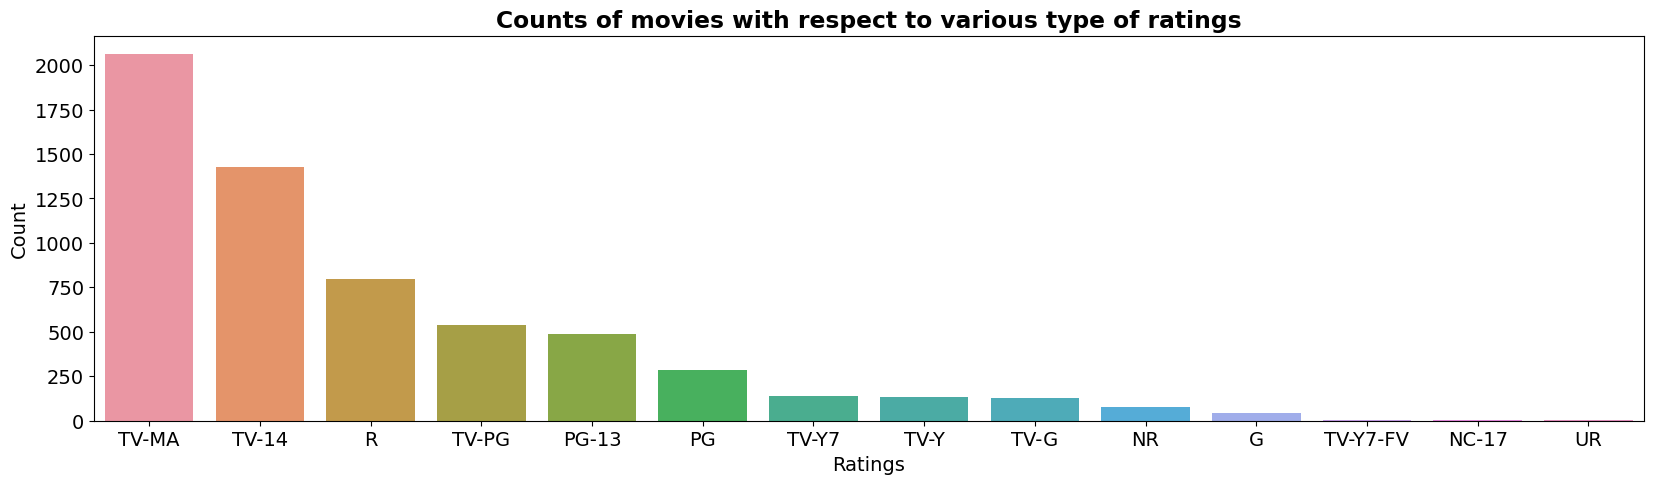

In [25]:
# Chart - 5 visualization code
movie_ratings = movies_df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).reset_index()
# top10_movies = movies_df['listed_in'].value_counts().reset_index(name='count').head(10)
# print(top10_movies)
sns.barplot(x='rating',y='count',data=movie_ratings)

# setting chart title
plt.title('Counts of movies with respect to various type of ratings')
plt.ylabel('Count')
plt.xlabel('Ratings')
# display chart
plt.show()


##### 1. Why did you pick the specific chart?

easy to show & interpret this chart   

##### 2. What is/are the insight(s) found from the chart?

Count of Movies with respected type of Rating

#### Chart - 6

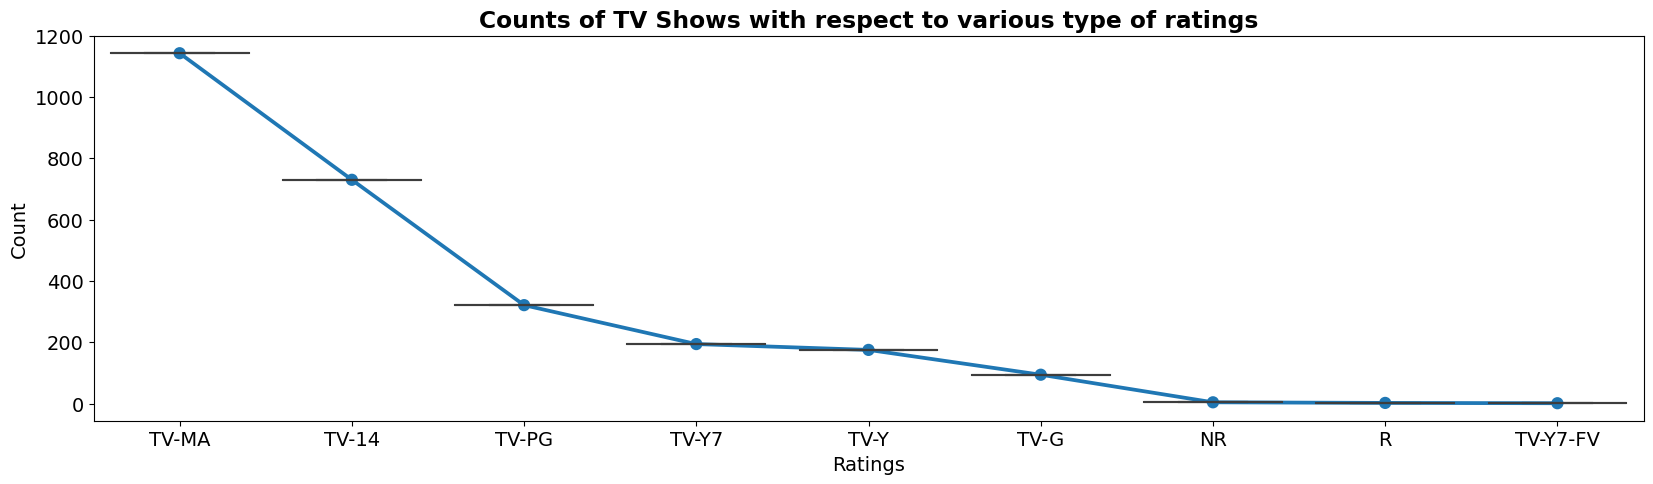

In [26]:
# Chart - 6 visualization code
tv_shows_ratings = tv_shows_df.groupby(['rating'])['show_id'].count().reset_index(name='count')
tv_shows_ratings = tv_shows_ratings.sort_values('count', ascending=False).reset_index()

sns.pointplot(x='rating',y='count',data=tv_shows_ratings)
sns.boxplot(x='rating',y='count',data=tv_shows_ratings)

# setting chart title
plt.title('Counts of TV Shows with respect to various type of ratings')
plt.ylabel('Count')
plt.xlabel('Ratings')
# display chart
plt.show()
# print(tv_shows_ratings)


##### 1. Why did you pick the specific chart?

 scatter plot is best to undersatnd how the data is scattered in the given trends.

##### 2. What is/are the insight(s) found from the chart?

It is found that TV-MA rating is max that is 1016 for the TV Shows followed by 656 for TV-14 the least ratings are by TV-Y7-FV that is 1 and R is 2.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 understand the trends of ratings for TV showsAnswer Here

#### Chart - 7

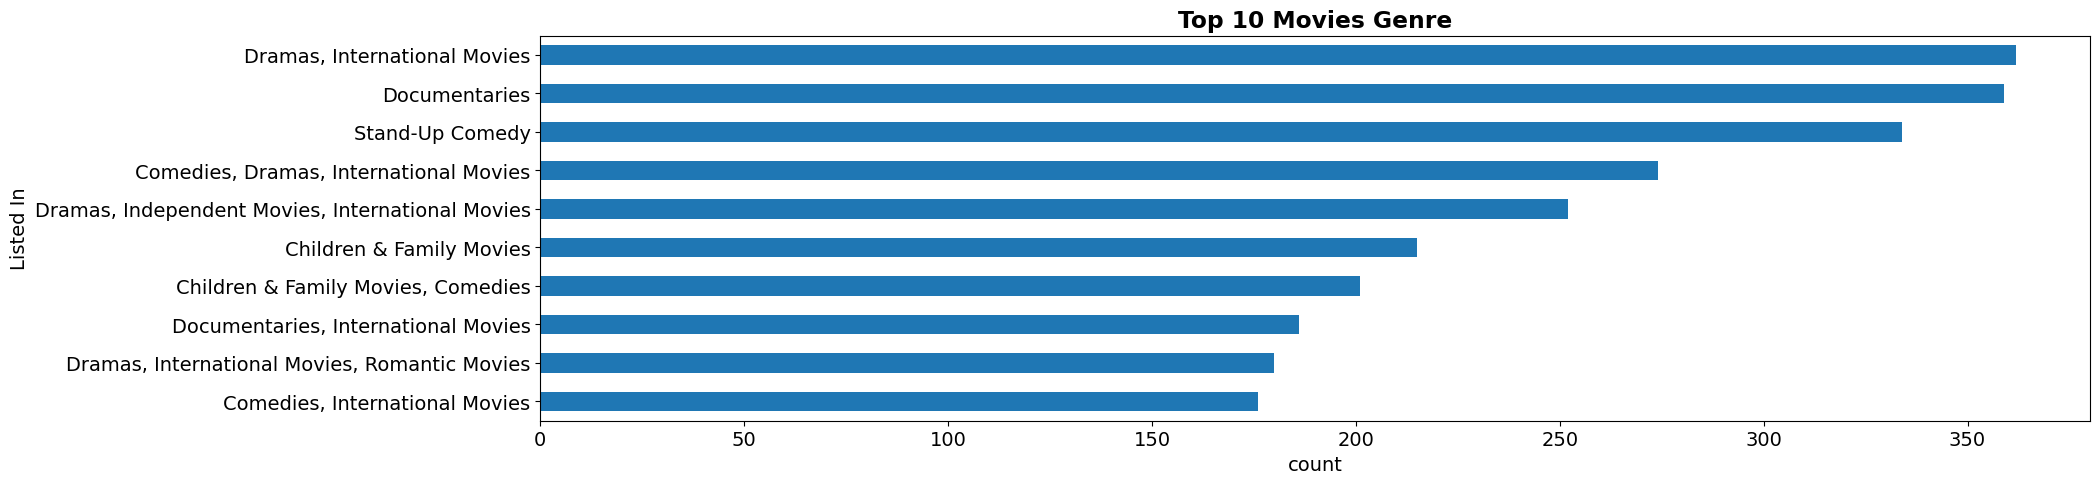

In [27]:
# Chart - 7 visualization code
# getting counts of different movies in listed in
top10_movies = movies_df['listed_in'].value_counts()
# sorting based on counts
top10_movies = top10_movies.sort_values(ascending=True)
# getting to 10 of the dataframe from bottom
top10_movies = top10_movies.tail(10)

# plotting
top10_movies.plot(kind='barh')
# setting chart title
plt.title('Top 10 Movies Genre')
plt.ylabel('Listed In')
plt.xlabel('count')
# display chart
plt.show()


##### 1. Why did you pick the specific chart?

Eaasy to Understand & Interpret

##### 2. What is/are the insight(s) found from the chart?

It is found that there are 334 documentaries and 321 Standup comedy

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

understand the trends of movies Genre

#### Chart - 8

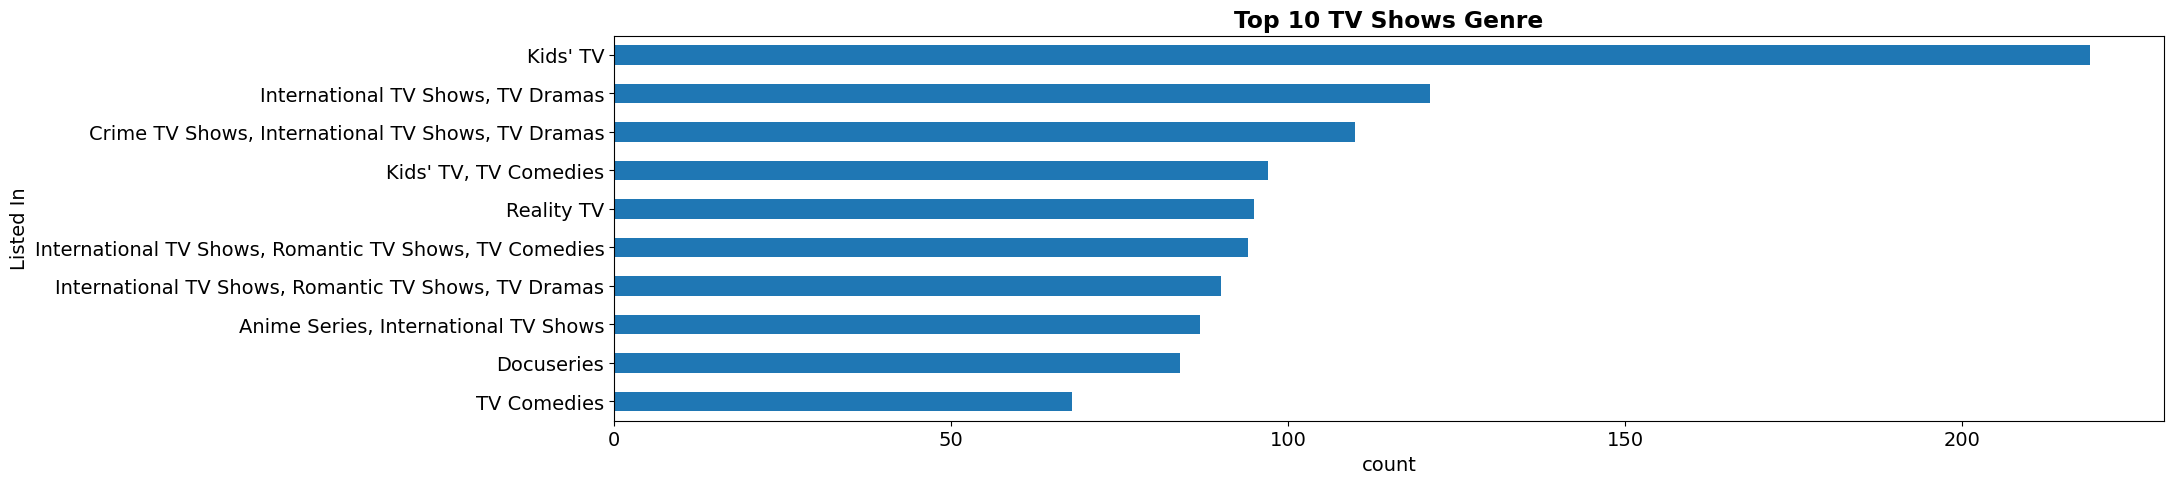

In [28]:
# Chart - 8 visualization code
# getting counts of different TV shows in listed in
top10_TV_Shows = tv_shows_df['listed_in'].value_counts()
# sorting based on counts
top10_TV_Shows = top10_TV_Shows.sort_values(ascending=True)
# getting to 10 of the dataframe from bottom
top10_TV_Shows = top10_TV_Shows.tail(10)

# plotting
top10_TV_Shows.plot(kind='barh')
# setting chart title
plt.title('Top 10 TV Shows Genre')
plt.ylabel('Listed In')
plt.xlabel('count')
# display chart
plt.show()


#### Chart - 9

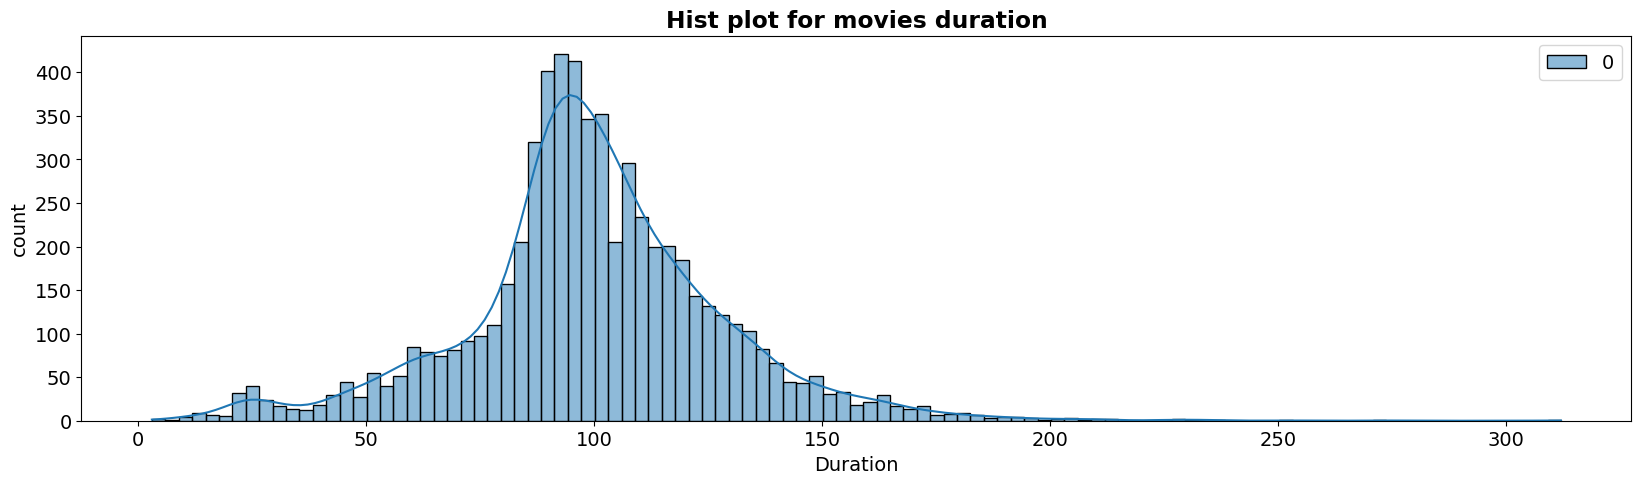

In [29]:
# Chart - 9 visualization code
sns.histplot(movies_df['duration'].str.extract('(\d+)').astype(int), kde=True, color='red')

# setting chart title
plt.title('Hist plot for movies duration')
plt.ylabel('count')
plt.xlabel('Duration')
# display chart
plt.show()

##### 1. Why did you pick the specific chart?

Better way to show the distribution

##### 2. What is/are the insight(s) found from the chart?

We can clearly see the Movie distribution in this given chart.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
sns.histplot(tv_shows_df['duration'].str.extract('(\d+)').astype(int), kde=True, color='red')
# setting chart title
plt.title('Hist plot for TV Show duration')
plt.ylabel('count')
plt.xlabel('Duration')
# display chart
plt.show()

##### 1. Why did you pick the specific chart?

Better To understand the Distribution.  

##### 2. What is/are the insight(s) found from the chart?

We can see the Tv show distribution.

#### Chart - 11

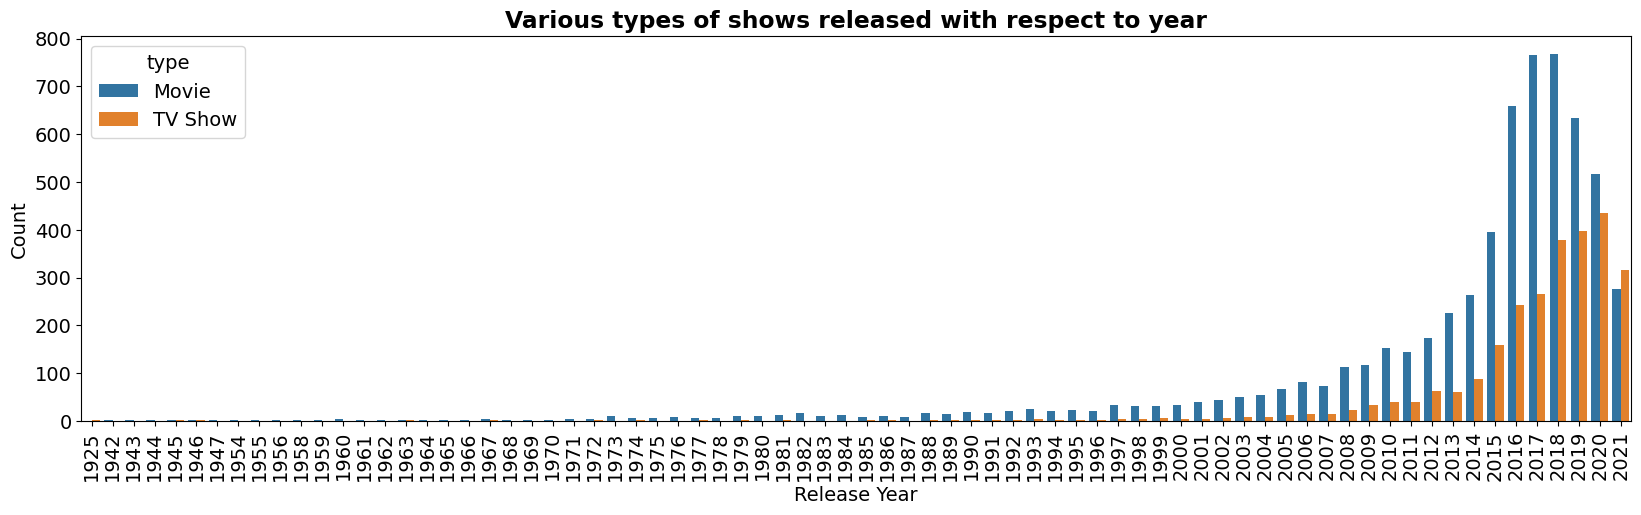

In [30]:
# Chart - 11 visualization code
sns.countplot(x='release_year',hue='type', data=df)

# setting chart title
plt.title('Various types of shows released with respect to year')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Count')

# display chart
plt.show()

##### 1. Why did you pick the specific chart?

A seaborn count plot shows counts of TV Shows and Movies with respect to various years

##### 2. What is/are the insight(s) found from the chart?

The trends of TV shows increased over time the moves relased after 2010 started to list on netflix trends increased

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The trends of TV shows increased over time.

#### Chart - 12 - Correlation Heatmap

<Axes: >

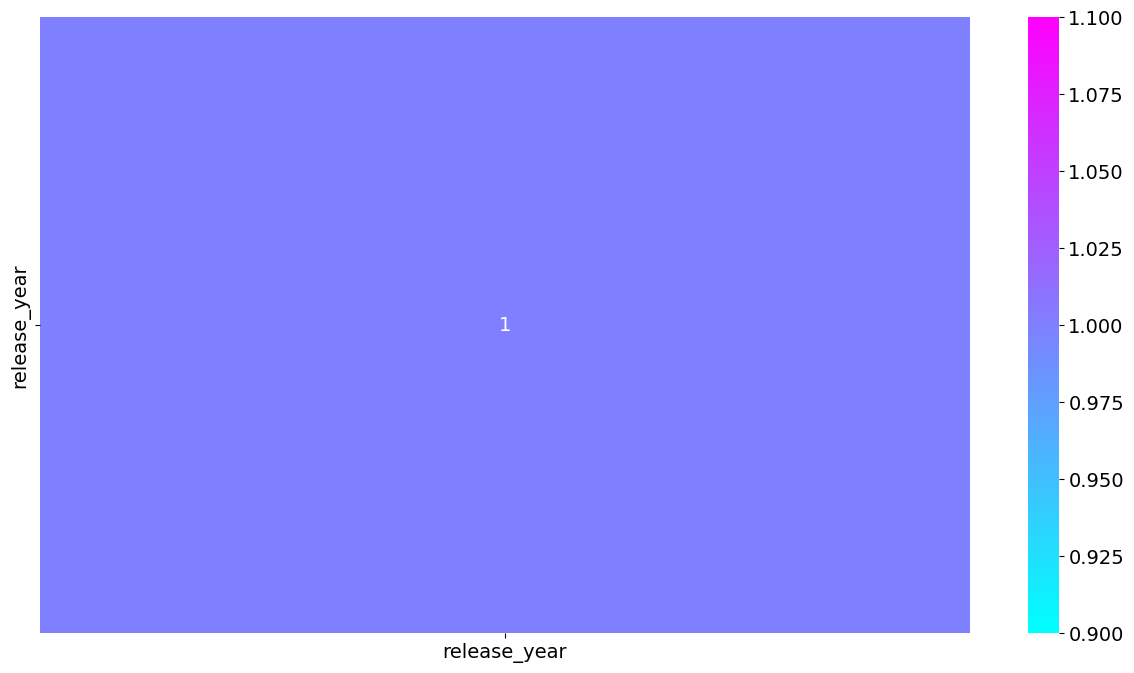

In [31]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()
plt.figure(figsize=(15,8))
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='cool')


##### 1. Why did you pick the specific chart?

 corelation chart shows the relation between the two specific feature

#### Chart - 15 - Pair Plot

Text(0.5, 1.0, 'Pair Plot')

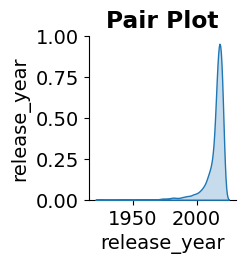

In [32]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind="kde", kind = 'reg')


#setting labels to infer the plot
plt.title('Pair Plot')

##### 1. Why did you pick the specific chart?

Pair plots are used to show relationship between various variables

Pair plots can also help us explore the distribution of variables in your dataset

##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of int type, we are unable to visualize the pair plot

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Netflix has the highest number of content in the United States, followed by India. India has the highest number of movies on Netflix

Null hypothesis H0: The average number of movies on Netflix in the United States is equal to the average number of movies on Netflix in India.

Alternate hypothesis Ha: The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
us_movie_df = movies_df[movies_df.country == 'United States']
india_movie_df = movies_df[movies_df.country == 'India']

# Perform a two-sample t-test between the release years of the two groups of movies
t, p = ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Set the significance level to 0.05
alpha = 0.05

# Check if the calculated p-value is less than the significance level
if p < alpha:
  # If the p-value is less than the significance level, reject the null hypothesis
  print("We reject the null hypothesis.")
else:
  # If the p-value is greater than or equal to the significance level, fail to reject the null hypothesis
  print("We fail to reject the null hypothesis.")

We fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies available on Netflix in the United States and India, I conducted a two-sample t-test, also known as an independent samples t-test or unpaired t-test. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

##### Why did you choose the specific statistical test?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movie data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

According to the countplot, it appears that Netflix adds the highest number of movies and TV shows during the period between October and January. This period seems to be the busiest time of year for Netflix in terms of adding new content to its platform.

Null hypothesis H0: There is no significant difference in the number of movies and TV shows added by Netflix across different months.
Alternate hypothesis Ha: There is a significant difference in the number of movies and TV shows added by Netflix across different months.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
# Convert the date_added column of the DataFrame to a datetime format
df["date_added"] = pd.to_datetime(df["date_added"])

# Extract the month name from the date_added column and create a new column
df["month_added"] = df["date_added"].dt.month_name()

# Create a contingency table of the type and month_added columns
contingency_table = pd.crosstab(df["type"], df["month_added"])

# Perform a chi-square test on the contingency table
from scipy.stats import chi2_contingency
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

# Rounding to 2
chi2_statistic = round(chi2_statistic, 2)
p_value = round(p_value, 2)

# Print the results
print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")

print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-square statistic: 18.28
P-value: 0.08
Degrees of Freedom: 11
Expected Frequencies:
[[531.75631399 525.48395904 565.90580205 391.67372014 513.63617747
  576.35972696 507.36382253 516.42389078 440.45870307 491.33447099
  529.66552901 535.93788396]
 [231.24368601 228.51604096 246.09419795 170.32627986 223.36382253
  250.64027304 220.63617747 224.57610922 191.54129693 213.66552901
  230.33447099 233.06211604]]


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, I performed a chi-square test for independence. The chi-square test is used to determine if there is a significant association between two categorical variables. In this case, I wanted to test if there was a significant association between the time of year and the number of new movies and TV shows added to Netflix.

##### Why did you choose the specific statistical test?

I choose the chi-square test for independence as I was interested in testing for a potential association between two categorical variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The number of movies on Netflix is greater than the number of TV shows, with 5372 movies and 2398 TV shows currently available on the platform.

Null hypothesis H0: The number of movies and TV shows on Netflix is not significantly different.

Alternate hypothesis Ha: The number of movies on Netflix is significantly greater than the number of TV shows.

#### 2. Perform an appropriate statistical test.

In [35]:
import statsmodels.api as sm

# Count the number of movies and TV shows
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']

# Set counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]
nobs = [len(df), len(df)]

# Print counts and sample sizes
print('Counts:', counts)
print('Sample sizes:', nobs)

# Perform a z-test assuming equal proportions
z_stat, p_val = sm.stats.proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print z-test results
print('z-statistic:', z_stat)
print('p-value:', p_val)


Counts: [6126, 2664]
Sample sizes: [8790, 8790]
z-statistic: 52.22129336993358
p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

I used a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the two-sample z-test for proportions to compare the number of movies and TV shows on Netflix because the data consists of two categorical variables

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Already done with this step earlier

#### 1. Expand Contraction

In [37]:
# Expand Contraction
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Not available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Known,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,Not available,Not Known,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September


#### 2. Lower Casing

In [38]:
# Create a new column called 'tags' in the DataFrame 'df'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in', and 'cast' columns
df['tags'] = df['description'] + ' ' + df['rating'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['cast']

In [39]:
df['tags']

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: tags, Length: 8790, dtype: object

In [40]:
print(df['tags'][0])

As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable. PG-13 United States Documentaries Not available


In [41]:
# Assuming 'tags' is a valid column in your DataFrame
def to_lower(x):
    return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
df['tags'] = df['tags'].apply(to_lower)

# Cross-check the result for the function created
print(df['tags'][0])


as her father nears the end of his life, filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable. pg-13 united states documentaries not available


#### 3. Removing Punctuations

In [42]:
# Remove Punctuations
# Define a function to remove punctuation from text
import string
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)

    # Return the text with punctuation removed
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
df['tags'] = df['tags'].apply(remove_punctuation)

# Print the first 'tags' value to cross-check that the function worked as expected
print(df['tags'][0])


as her father nears the end of his life filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable pg13 united states documentaries not available


#### 4. Removing URLs & Removing words and digits contain digits.

In [43]:
# Remove URLs & Remove words and digits contain digits
df['tags'] = df['tags'].str.replace(r'\w*\d\w*', '', regex=True)
# remove words and digits containing digits

# cross checking our result for the function created
print(df['tags'][0])

as her father nears the end of his life filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable  united states documentaries not available


#### 5. Removing Stopwords & Removing White spaces

In [44]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset if you haven't done so already
nltk.download('stopwords')

# Set up the stopwords
stop_words = set(stopwords.words('english'))

def remove_stop_words(x):
    ''' function to remove stop words'''
    x = x.split()
    res = ''
    for word in x:
        if word not in stop_words:  # Use stop_words instead of remove_stop_words
            res += word + ' '  # Fix is here, no space before word
    return res.strip()  # Trim any leading or trailing spaces

# Cross-checking the result before and after applying the function
print('Before:')
print(df['tags'][0])

# Applying the created function
df['tags'] = df['tags'].apply(remove_stop_words)

# Cross-checking the result after applying the function
print('After:')
print(df['tags'][0])


[nltk_data] Downloading package stopwords to /root/nltk_data...


Before:
as her father nears the end of his life filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable  united states documentaries not available
After:
father nears end life filmmaker kirsten johnson stages death inventive comical ways help face inevitable united states documentaries available


[nltk_data]   Unzipping corpora/stopwords.zip.


In [45]:
df['tags'] = df['tags'].str.strip()
# cross checking our result for the function created

print(df['tags'][0])

father nears end life filmmaker kirsten johnson stages death inventive comical ways help face inevitable united states documentaries available


#### 6. Rephrase Text

In [ ]:
#not required

#### 7. Tokenization

In [ ]:
# Tokenization not required

#### 8. Text Normalization

In [46]:
!pip install snowballstemmer
from snowballstemmer import stemmer

In [47]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you've already defined your DataFrame df

# Create an object of Snowball Stemmer
stemmer = SnowballStemmer("english")

# Define the stemming function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

# Apply stemming to the 'tags' column
df['tags'] = df['tags'].apply(stemming)

# Vectorizing Text
# Create the object of tfidf vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features=9000)

# Fit the vectorizer using the text data
tfidf.fit(df['tags'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()


In [48]:
# convert vector into array form for clustering
vector = tfidf.transform(df['tags']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of vector : (8790, 9000)
datatype : <class 'numpy.ndarray'>


#### 9. Part of speech tagging

In [ ]:
# not required

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text is not required

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(random_state=32)
pca.fit(vector)


PCA(random_state=32)

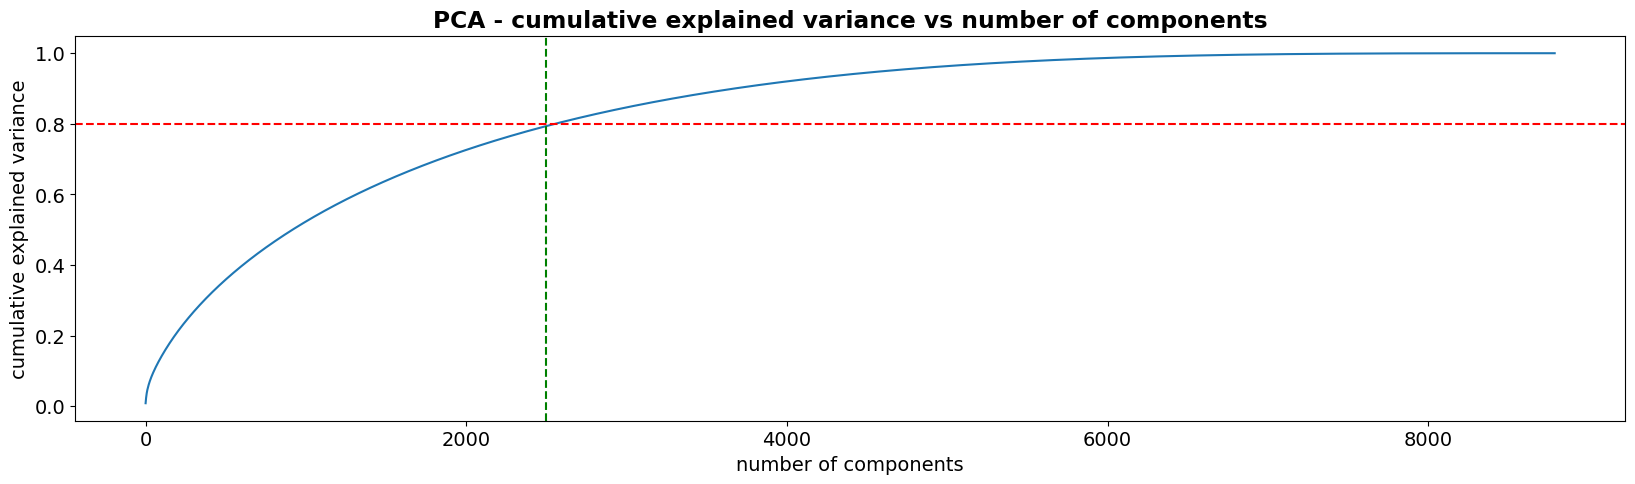

In [52]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')
plt.show()

In [53]:
# reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)

In [54]:
# transformed features
X = pca.transform(vector)

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

###Silhouette score(2-12)

For n_clusters = 2, silhouette score is 0.007574577112475743
For n_clusters = 3, silhouette score is 0.008063179546766235
For n_clusters = 4, silhouette score is 0.010119304839030572
For n_clusters = 5, silhouette score is 0.01114919057838816
For n_clusters = 6, silhouette score is 0.00859055956561536
For n_clusters = 7, silhouette score is 0.01103831234408066
For n_clusters = 8, silhouette score is 0.010685829986205066
For n_clusters = 9, silhouette score is 0.011349771943251043
For n_clusters = 10, silhouette score is 0.011999379046650356
For n_clusters = 11, silhouette score is 0.012633737115451467


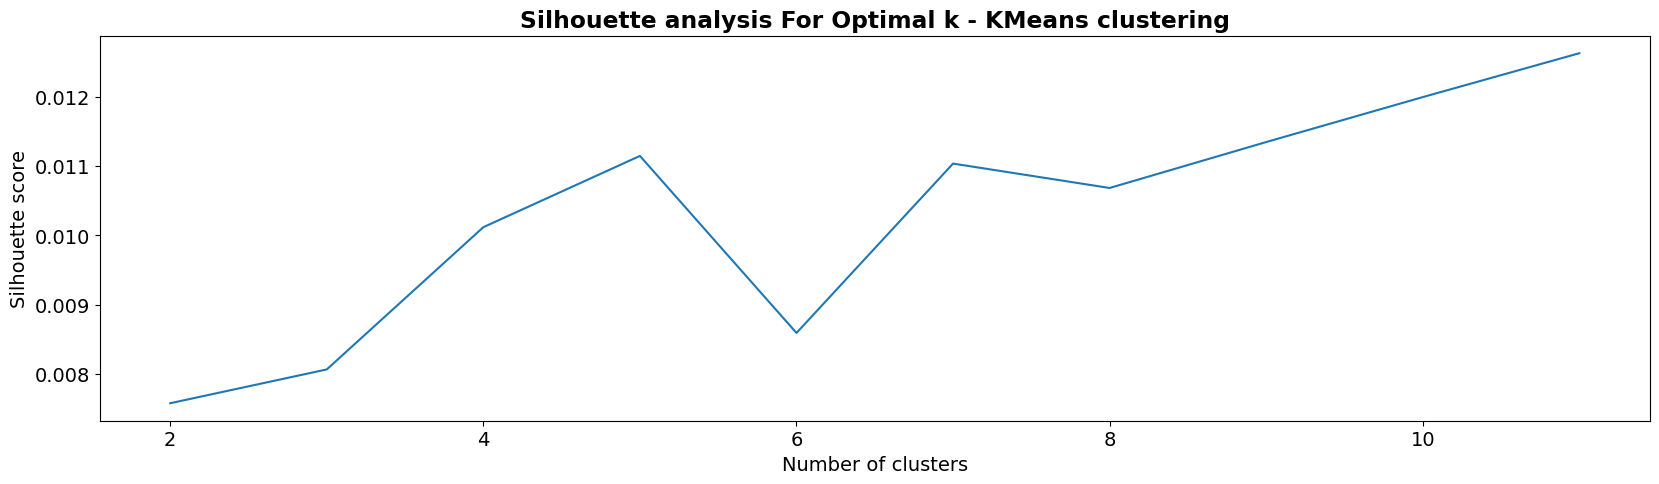

In [55]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
# range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range(2, 12):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_avg.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(range(2,12), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [56]:
# Clustering the data into 10 clusters as silhouette score
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=32)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=32)

In [57]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)
print(f'Kmeans distortion = {kmeans_distortion}')
print(f'Silhouette Score = {kmeans_silhouette_score}')

Kmeans distortion = 6560.341853476626
Silhouette Score = 0.012208215939403891


In [58]:
# updating kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

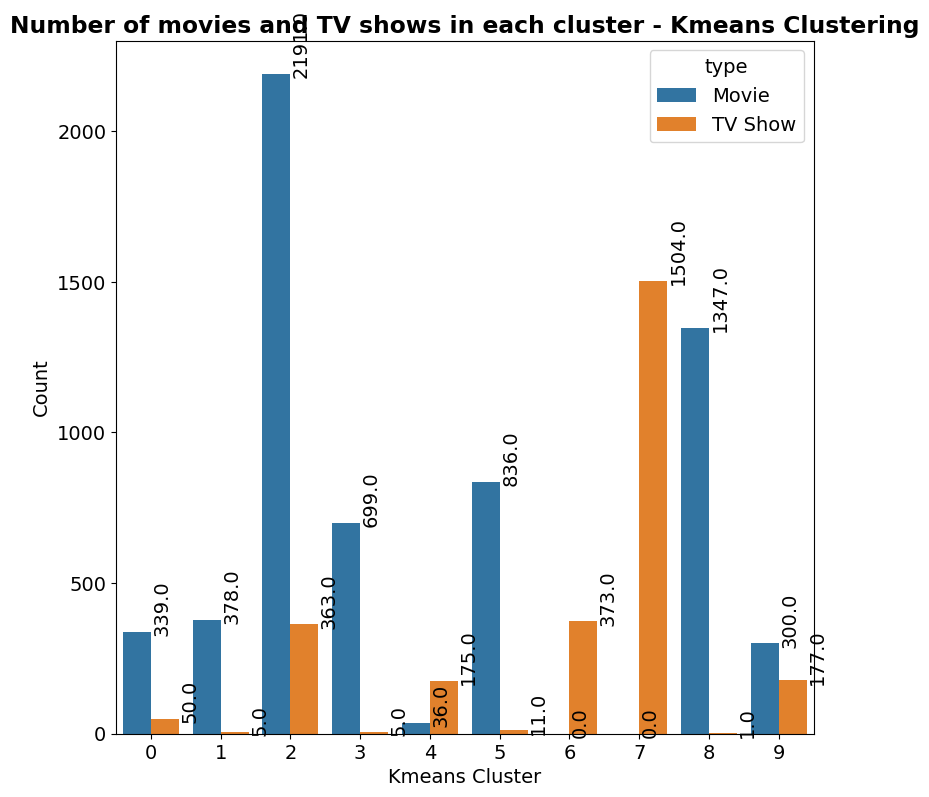

In [59]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(9,9))
sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
plt.xlabel('Kmeans Cluster')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', rotation=90)
plt.show()

**Calculating Cluster Using Dendogram**

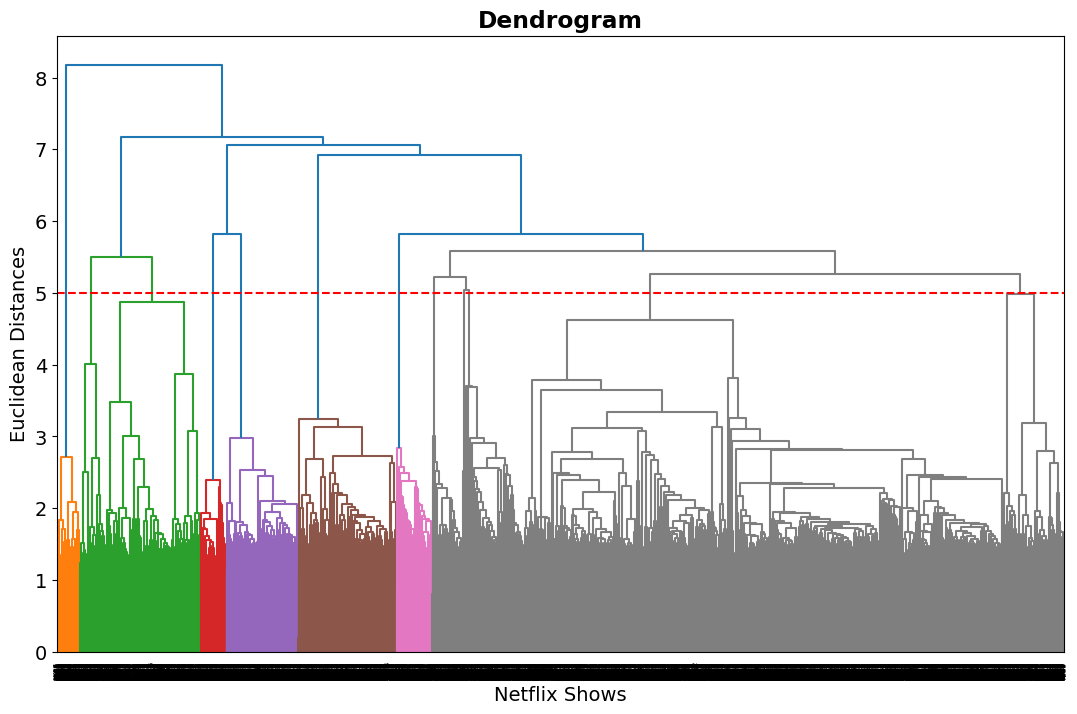

In [60]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Euclidean Distances')
plt.axhline(y= 5, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.show()

**With threshold 5.5 we can make 5 clusters**

In [61]:
from sklearn.metrics.pairwise import euclidean_distances


In [62]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters = hierarchical.fit_predict(X)
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_


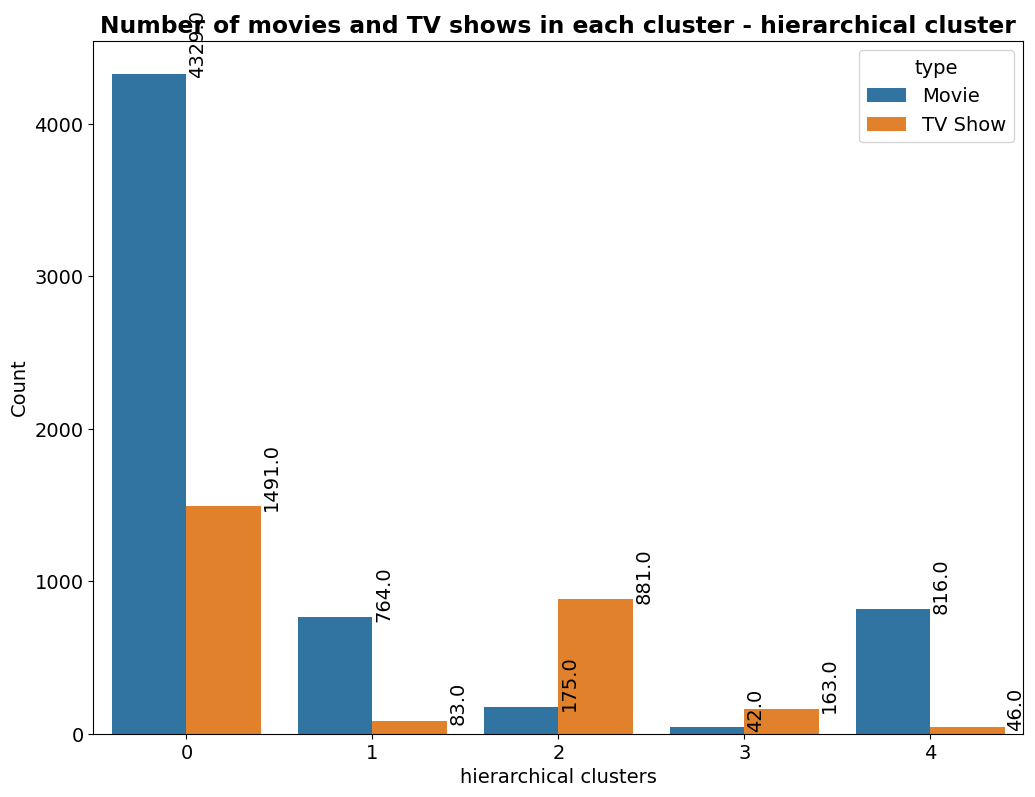

In [63]:
plt.figure(figsize=(12,9))
sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - hierarchical cluster')
plt.xlabel('hierarchical clusters')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', rotation=90)
plt.show()

###Recommandation system

In [64]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# dropping show-id and index column
recommender_df = recommender_df.drop(columns=['index', 'show_id'])

In [65]:
def recommend(movie, sim, output_name):
    '''
    This function recommends top 5 movies similar to the input movie based on their similarity scores.
    '''
    # Display the input movie name
    print('--'*30)
    print(f'recommendations based on {output_name}')
    print('--'*30)
    print(f"Since you liked {movie}, you may also like: \n")

    # Find the index position of the input movie
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # Sort the movies based on similarity score to find distances from recommended movies
    distances = sorted(list(enumerate(sim[index])), reverse=True, key=lambda x:x[1])

    # List the top 5 recommended movies
    for i in distances[1:6]:
        print(df.iloc[i[0]].title)
    print('\n')

In [66]:
# calculate cosine similarity on transformed array independent features created from tags(cluster) column after performing PCA for dimenssionality reduction.
# setting cos_similarity
cos_similarity = cosine_similarity(X)

# setting linear_kernel
lin_similarity = linear_kernel(X)

# setting rbf_kernel
rbf_similarity = rbf_kernel(X)

#setting sigmoid_kernel
sigmoid_similarity = sigmoid_kernel(X)

# setting polynomial_kernel
polynomial_similarity = polynomial_kernel(X)

# setting laplacian_kernel
# laplacian_similarity = laplacian_kernel(X) # commenting out as it is taking lot of time.

# setting chi2_kernel
# chi2_similarity = chi2_kernel(X) # not suitable for the given scenario

In [67]:
# # The below code can be uncommented to get the details and test the recommender
# # getting sample of Indian movies
# df_india = df.loc[df['country'] == 'India']
# df_india.title.sample(20)

# getting recommendations for the movie
recommend('Welcome', cos_similarity, 'Cosine similarity')
recommend('Welcome', lin_similarity,'linear kernel')
recommend('Welcome', rbf_similarity,'radial basis function (RBF) kernel')
recommend('Welcome', sigmoid_similarity,'sigmoid kernel')
recommend('Welcome', polynomial_similarity,' polynomial kernel')
# recommend('Welcome', laplacian_similarity)
# recommend('Welcome', chi2_similarity)


------------------------------------------------------------
recommendations based on Cosine similarity
------------------------------------------------------------
Since you liked Welcome, you may also like: 

Race
Aitraaz
Humko Deewana Kar Gaye
Tezz
Awara Paagal Deewana


------------------------------------------------------------
recommendations based on linear kernel
------------------------------------------------------------
Since you liked Welcome, you may also like: 

Race
Aitraaz
Humko Deewana Kar Gaye
Awara Paagal Deewana
Tezz


------------------------------------------------------------
recommendations based on radial basis function (RBF) kernel
------------------------------------------------------------
Since you liked Welcome, you may also like: 

Race
Tezz
Humko Deewana Kar Gaye
Aitraaz
Awara Paagal Deewana


------------------------------------------------------------
recommendations based on sigmoid kernel
------------------------------------------------------------


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
dir_path = '/content/drive/MyDrive/My_new_numpy'

df_export = dir_path + 'recommender_df.csv'
X_export = dir_path + 'X.csv'
# Create a DataFrame from the transformed data
X_to_export = pd.DataFrame(X)

# Save the DataFrame to a CSV file
X_to_export.to_csv('X_export', index=False)
recommender_df.to_csv('df_export', index=False)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the transformed data from a CSV file
recom_df = pd.read_csv('df_export')
X_import = pd.read_csv('X_export')

# Convert the DataFrame to a NumPy array
X_imported = X_import.values

# **Conclusion**

Our aim was to cluster shows for a content-based recommender system recommending 5 shows to users based on viewing history. Starting with 7787 records and 11 attributes, we focused on Netflix's content. Analysis revealed more movies than TV shows, with a growing U.S. collection. We selected six attributes for clustering, transformed into a 9000-feature TFIDF vector, and reduced dimensions to 2500 using PCA. K-Means and Agglomerative clustering resulted in 7 and 5 optimal clusters, respectively. We built a content-based recommender system using cosine similarity, offering personalized suggestions by analyzing the user's watched shows, presenting 5 top-notch recommendations to explore.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***